In [43]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [39]:
#Загружаем данные и меняем формат фильтров со строки на словарь 
df = pd.read_csv('Data.csv')
df['search_params'] = df['search_params'].apply(json.loads)

In [40]:
#будем делать +1 к категории, если встретим её в aliases датафрейма
counts = {
        'composed_document':0, 'fiction':0, 'game_app':0, 'globallab_project':0, 'laboratory':0,
         'lesson_template':0, 'lesson_template_meeting':0, 'lesson_template_thematic':0,
         'test_specification':0, 'textbook':0, 'video':0, 'video_lesson':0, 'sound':0, 
         'web_app_document':0, 'image':0, 'workbook':0
         }

In [41]:
for index, row in df.iterrows():
    if 'aliases' in row['search_params']:
        for alias in row['search_params']['aliases']:
            if alias in counts: counts[alias] += 1

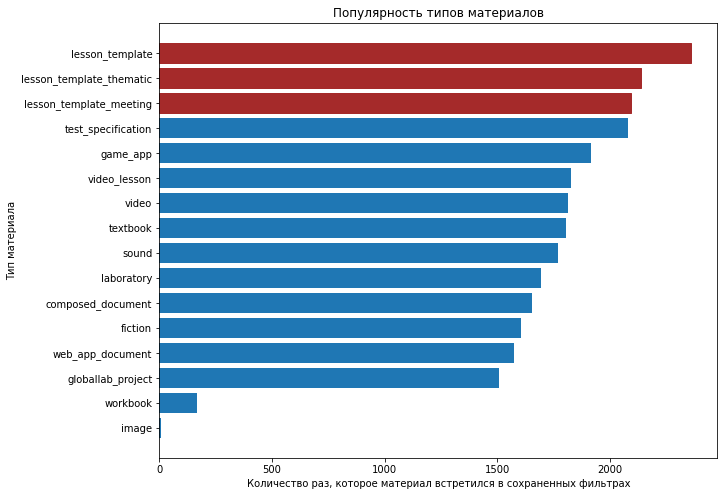

In [52]:
sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}

# Визуализация данных в виде столбчатой диаграммы
plt.figure(figsize=(10,8))

bars = plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()))
for i in range(1, 4):
    bars[-i].set_color('brown')

plt.xlabel('Количество раз, которое материал встретился в сохраненных фильтрах')
plt.ylabel('Тип материала')
plt.title('Популярность типов материалов')
plt.show()

#### Получили топ-3 самых популярных типа материалов
1. lesson_template
2. lesson_template_thematic
3. lesson_template_meeting